In [1]:
#import data
import pandas as pd

Marvel_Data = pd.read_csv('movie_ratings_v2.csv')
df = pd.DataFrame(Marvel_Data,columns=['Index','Movie','Year_Release','IMDB_Ratings','Metascore', 'Votes', 
                                       'Gross', 'RT','Budget','US_Box_Office_2',
                                       'lag_IMDB', 'lag_Metascore', 'lag_Votes','lag_RT','lag_Budget',
                                       'lag_US_Box_Office_2', 'lag_Worldwide_Box_Office'])
print(df)

    Index                                Movie Year_Release  IMDB_Ratings  \
0       1                             Iron Man     5/2/2008           7.9   
1       2                  The Incredible Hulk    6/13/2008           6.9   
2       3                           Iron Man 2     5/7/2010           7.0   
3       4                                 Thor     5/6/2011           7.0   
4       5   Captain America: The First Avenger    7/22/2011           6.9   
5       6                         The Avengers    4/11/2012           8.1   
6       7                           Iron Man 3     5/3/2013           7.2   
7       8                 Thor: The Dark World    11/8/2013           7.0   
8       9  Captain America: The Winter Soldier     4/4/2014           7.8   
9      10              Guardians of the Galaxy     8/1/2014           8.1   
10     11              Avengers: Age of Ultron     5/1/2015           7.4   
11     12                              Ant-Man    7/17/2015           7.3   

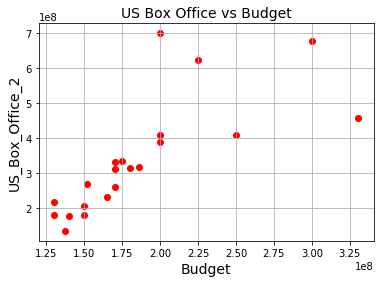

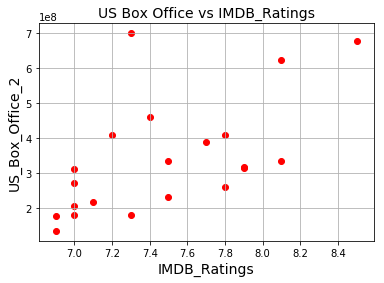

In [4]:
#checking for linearity for the main variables of interest
import matplotlib.pyplot as plt

#building a scatter plot to explore the relationship of US Box Office vs Budget
plt.scatter(df['Budget'], df['US_Box_Office_2'], color='red')
plt.title('US Box Office vs Budget', fontsize=14)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('US_Box_Office_2', fontsize=14)
plt.grid(True)
plt.show()

#building a scatter plot to explore the relationship of US Box Office vs Budget
plt.scatter(df['IMDB_Ratings'], df['US_Box_Office_2'], color='red')
plt.title('US Box Office vs IMDB_Ratings', fontsize=14)
plt.xlabel('IMDB_Ratings', fontsize=14)
plt.ylabel('US_Box_Office_2', fontsize=14)
plt.grid(True)
plt.show()

#assume positive linear relationship for both cases, so we can proceed to building the multivariate regression model

In [5]:
#Buuilding the regression model using statsmodels package
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Building the first model with using the original data only

model1 = smf.ols(formula = '''US_Box_Office_2 ~ Budget + IMDB_Ratings + Metascore + RT + Votes''', 
                data=df, missing='drop')
results1 = model1.fit()

print(results1.summary())

#Building model 2 built on previous movie's data only

model2 = smf.ols(formula = '''US_Box_Office_2 ~ lag_IMDB + lag_Metascore + lag_Votes + lag_RT + lag_Budget 
                 + lag_US_Box_Office_2 + lag_Worldwide_Box_Office''', 
                 data=df, missing='drop')
results2 = model2.fit()

print(results2.summary())

#Predicting new movie's US Box Office based on subjective Avengers End Game inputs for model 2
M_Values = {'lag_IMDB' : [7], 'lag_Metascore' : [65], 'lag_Votes': [89555],
'lag_RT': [0.8], 'lag_Budget': [152000000], 'lag_US_Box_Office_2': [270079899], 'lag_Worldwide_Box_Office': [779179899]}

df_new = pd.DataFrame(M_Values,columns=['lag_IMDB', 'lag_Metascore', 'lag_Votes',
'lag_RT', 'lag_Budget', 'lag_US_Box_Office_2', 'lag_Worldwide_Box_Office']) 
df_new


print("Forecasted US Box office for Avengers: Endgame", results2.predict(df_new))

                            OLS Regression Results                            
Dep. Variable:        US_Box_Office_2   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     6.811
Date:                Tue, 19 Mar 2019   Prob (F-statistic):            0.00168
Time:                        15:59:04   Log-Likelihood:                -413.87
No. Observations:                  21   AIC:                             839.7
Df Residuals:                      15   BIC:                             846.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.579e+08   4.43e+08     -1.033   

In [6]:
#Model 3 is a specification that combines previous models and yields the highest R^2

model3 = smf.ols(formula = '''US_Box_Office_2 ~ Budget + IMDB_Ratings + Metascore + RT + Votes + lag_IMDB 
                            + lag_Metascore + lag_Votes + lag_RT + lag_Budget 
                            + lag_US_Box_Office_2 + lag_Worldwide_Box_Office''', 
                data=df, missing='drop')
results3 = model3.fit()

print(results3.summary())

#Predicting new movie's US Box Office based on expected inputs for Avengers End Game (subjective, except for lagged variables)
M3_Values = {'Budget':[400000000], 'IMDB_Ratings' :[7.9], 'Metascore' :[70], 
             'RT':[0.88], 'Votes':[536665],'lag_IMDB' : [7], 'lag_Metascore' : [65], 'lag_Votes': [89555],
             'lag_RT': [0.8], 'lag_Budget': [152000000], 'lag_US_Box_Office_2': [270079899], 'lag_Worldwide_Box_Office': [779179899]}

df2_new = pd.DataFrame(M3_Values,columns=['Budget', 'IMDB_Ratings', 'Metascore', 'RT', 'Votes','lag_IMDB', 'lag_Metascore', 'lag_Votes',
'lag_RT', 'lag_Budget', 'lag_US_Box_Office_2', 'lag_Worldwide_Box_Office']) 
df2_new

print("Forecasted US Box office for Avengers: Endgame", results3.predict(df2_new))

                            OLS Regression Results                            
Dep. Variable:        US_Box_Office_2   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     5.629
Date:                Tue, 19 Mar 2019   Prob (F-statistic):             0.0102
Time:                        15:59:57   Log-Likelihood:                -402.74
No. Observations:                  21   AIC:                             831.5
Df Residuals:                       8   BIC:                             845.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               